In [1]:
import cv2
from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread('sim0.png',0) # queryImage
img2 = cv2.imread('sim1.png',0) # trainImage

In [5]:
#INsitiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.SIFT_create()
# find the keypoints and descripotrs with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

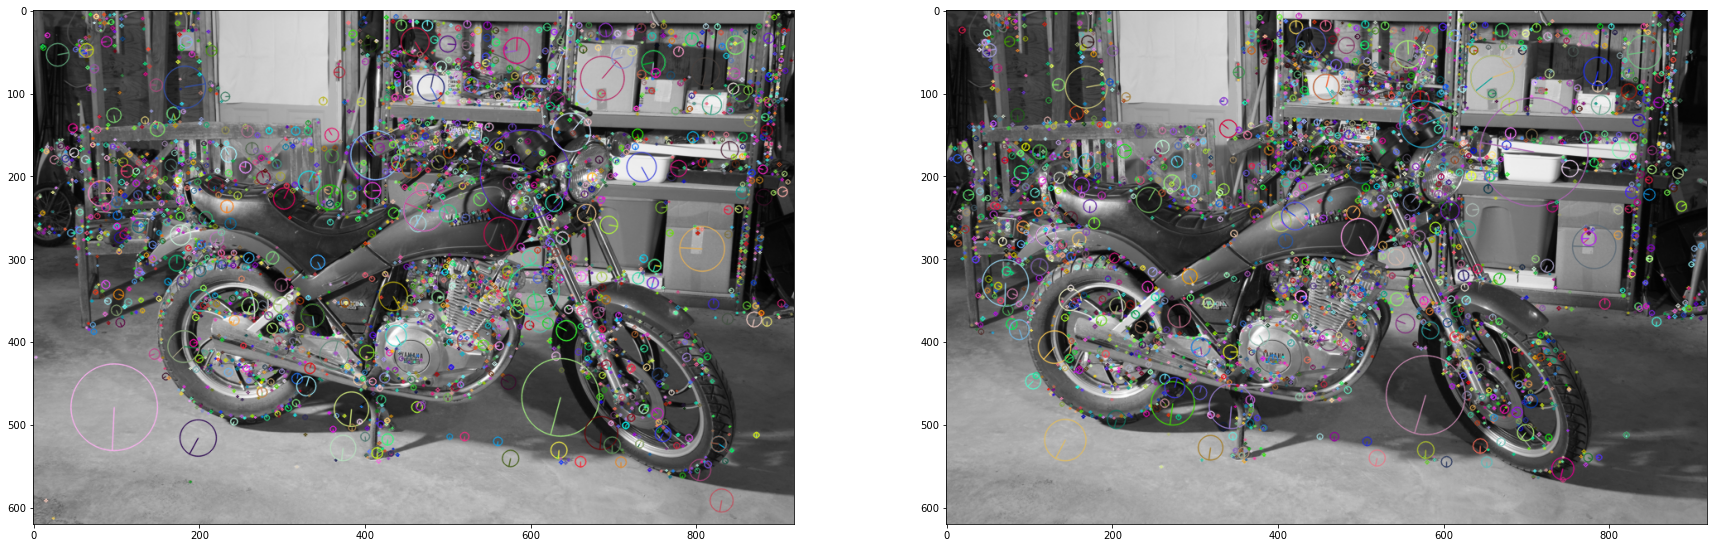

In [6]:
img1v = cv2.drawKeypoints(img1,kp1,img1,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v = cv2.drawKeypoints(img2,kp2,img2,flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,26))
plt.subplot(1,2,1),plt.imshow(img1v)
plt.subplot(1,2,2),plt.imshow(img2v)
plt.show()

In [14]:
# create BFMatcher object
bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.knnMatch(des1,des2, k=2)
# Sort them in the order of their distance.
good = []

In [15]:
for m,n in matches:
    if m.distance < 0.15*n.distance:
        good.append([m])

In [16]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

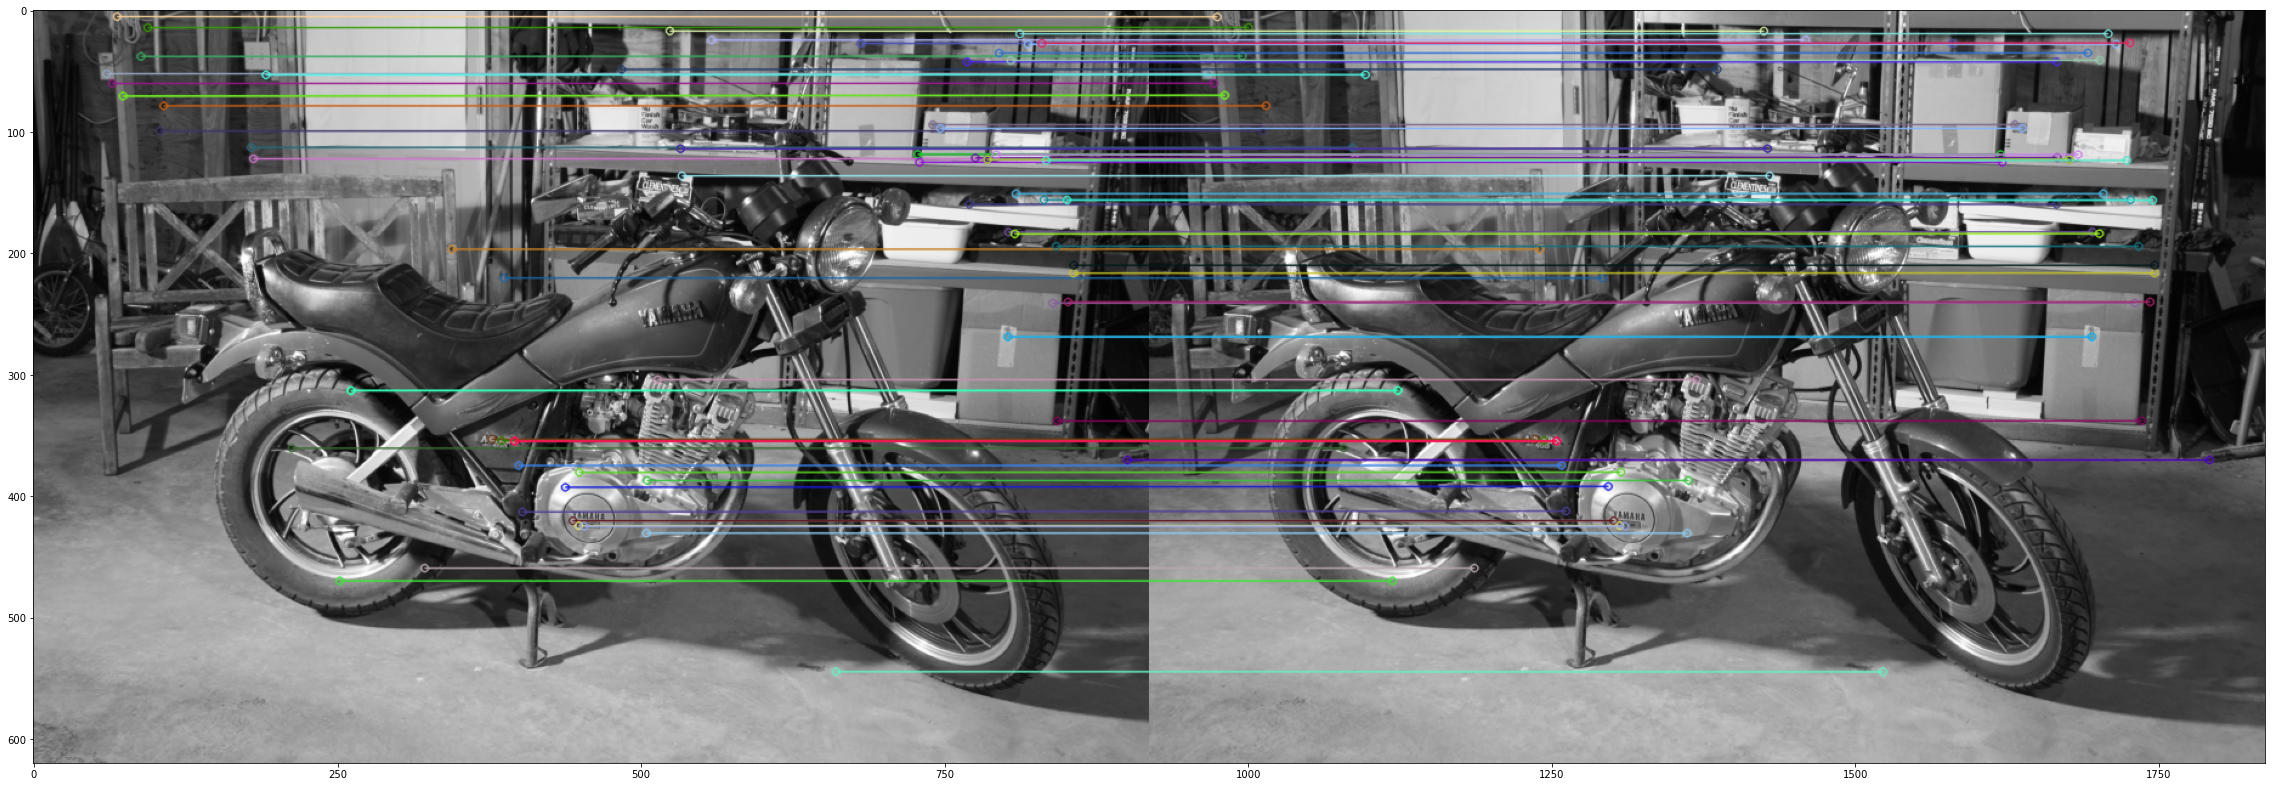

(<matplotlib.image.AxesImage at 0x1c9c1483fd0>, None)

In [17]:
plt.figure(figsize=(40,20))
plt.imshow(img3),plt.show()